<a href="https://colab.research.google.com/github/Daghem/Game/blob/main/data_processor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
dati = np.array([10, 20, 30, 40, 50])
print(f"Tipo di dato: {type(dati)}")
print(f"Media dei dati: {dati.mean()}")
print(f"Valore massimo: {dati.max()}")

Tipo di dato: <class 'numpy.ndarray'>
Media dei dati: 30.0
Valore massimo: 50


In [ ]:
class DataProcessor():
  def __init__(self, data):
    self.data = np.array(data)
  def normalizza(self):
    return self.data/self.data.max()
  def statistiche(self):
    media = self.data.mean()
    massimo = self.data.max()
    return media, massimo

prova = DataProcessor(dati)

print(prova.normalizza())
print(prova.statistiche())


[0.2 0.4 0.6 0.8 1. ]
(np.float64(30.0), np.int64(50))


In [ ]:
# Creiamo una matrice 2x3 (2 righe, 3 colonne)
matrice = np.array([[1, 2, 3], [4, 5, 6]])

print(f"Forma della matrice: {matrice.shape}")
# Risultato: (2, 3)

Forma della matrice: (2, 3)


In [ ]:
matrice_as_array = DataProcessor(matrice)
print(matrice_as_array.normalizza())
print(matrice_as_array.statistiche())

[[0.16666667 0.33333333 0.5       ]
 [0.66666667 0.83333333 1.        ]]
(np.float64(3.5), np.int64(6))


In [ ]:
obj = DataProcessor(np.random.rand(10, 3))
print(obj.normalizza())
print(obj.statistiche())


[[0.08696881 0.2458094  0.80442389]
 [0.10961955 0.15295934 0.77189547]
 [0.20431694 0.75983189 0.13703432]
 [0.07752333 0.65263248 0.40727469]
 [0.42772253 0.04152268 0.21401951]
 [0.91559468 0.4046399  0.7256134 ]
 [0.80611525 0.92343002 0.77026465]
 [0.22770658 0.27353963 0.58837687]
 [0.09698471 0.34013468 0.87581319]
 [0.90324091 1.         0.3106861 ]]
(np.float64(0.4646716275602144), np.float64(0.9778652251188453))


In [ ]:
import pandas as pd

# Simuliamo dei dati contabili
dati_contabili = {
    'Mese': ['Gen', 'Feb', 'Mar', 'Apr'],
    'Entrate': [10000, 12000, 9000, 15000],
    'Uscite': [8000, 8500, 9500, 10000]
}

df = pd.DataFrame(dati_contabili)

# Creiamo una nuova colonna calcolata (il Profitto)
df['Profitto'] = df['Entrate'] - df['Uscite']

print(df)

  Mese  Entrate  Uscite  Profitto
0  Gen    10000    8000      2000
1  Feb    12000    8500      3500
2  Mar     9000    9500      -500
3  Apr    15000   10000      5000


In [ ]:
import numpy as np

# Creiamo un dataset di 100 operazioni contabili casuali
np.random.seed(42)
dati = {
    'ID_Cliente': np.random.randint(100, 105, 100), # 5 clienti diversi
    'Importo': np.random.uniform(100, 5000, 100).round(2),
    'Categoria': np.random.choice(['Consulenza', 'Vendita', 'Abbonamento', 'Rimborso'], 100),
    'Giorni_Ritardo_Pagamento': np.random.randint(0, 60, 100)
}

df = pd.DataFrame(dati)
print("Prime 5 righe del registro:")
print(df.tail())

Prime 5 righe del registro:
    ID_Cliente  Importo    Categoria  Giorni_Ritardo_Pagamento
95         102   571.27   Consulenza                        27
96         104  4708.56  Abbonamento                        33
97         101  2048.10      Vendita                         1
98         101  2636.98     Rimborso                        31
99         100  4204.78  Abbonamento                        22


In [ ]:
# 1. Qual è l'importo totale incassato?
totale = df['Importo'].sum()

# 2. Qual è la media dei giorni di ritardo per ogni categoria?
ritardo_medio = df.groupby('Categoria')['Giorni_Ritardo_Pagamento'].mean()

print(f"Totale Incassato: {totale}€")
print("\nRitardo medio per categoria:")
print(ritardo_medio)

Totale Incassato: 248121.13€

Ritardo medio per categoria:
Categoria
Abbonamento    31.571429
Consulenza     33.636364
Rimborso       32.000000
Vendita        26.782609
Name: Giorni_Ritardo_Pagamento, dtype: float64


In [ ]:
# 1. Filtra solo i ritardi sopra i 30 giorni
ritardi_gravi = df[df['Giorni_Ritardo_Pagamento'] > 30]

print("Operazioni con oltre 30 giorni di ritardo:")
print(ritardi_gravi.head())

Operazioni con oltre 30 giorni di ritardo:
   ID_Cliente  Importo    Categoria  Giorni_Ritardo_Pagamento
1         104  4265.19     Rimborso                        33
4         104  1917.01      Vendita                        32
6         102  3363.02  Abbonamento                        46
7         102  2997.36      Vendita                        32
9         104  2850.09  Abbonamento                        59


In [ ]:

ritardatri = df.groupby('ID_Cliente')['Giorni_Ritardo_Pagamento'].sum()
ritardatario_cronico = ritardatri.max()
print(ritardatario_cronico)

865


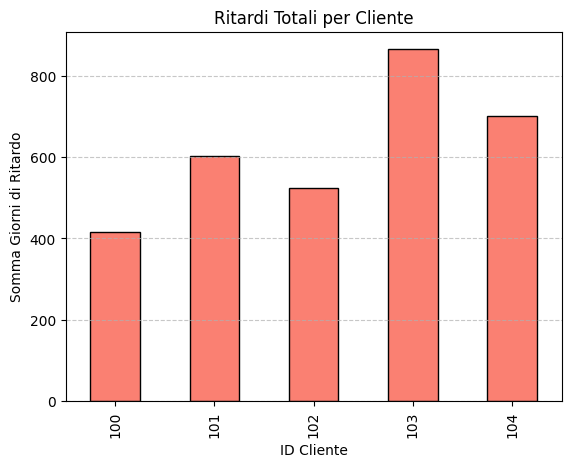

In [ ]:
import matplotlib.pyplot as plt

# Creiamo un grafico a barre dei ritardi per cliente
ritardatri.plot(kind='bar', color='salmon', edgecolor='black')

plt.title('Ritardi Totali per Cliente')
plt.xlabel('ID Cliente')
plt.ylabel('Somma Giorni di Ritardo')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [ ]:
# Aggiungiamo volutamente dei "buchi" al nostro database
df.loc[0, 'Importo'] = np.nan
df.loc[2, 'Giorni_Ritardo_Pagamento'] = np.nan

print("Valori mancanti per colonna:")
print(df.isnull().sum())

# Strategia: Riempiamo l'importo mancante con la MEDIA degli importi
df['Importo'] = df['Importo'].fillna(df['Importo'].mean())

# Strategia: Eliminiamo le righe dove mancano i giorni di ritardo
df.dropna(subset=['Giorni_Ritardo_Pagamento'], inplace=True)

NameError: name 'np' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# 1. Prepariamo i dati: l'AI capisce solo i numeri.
# Trasformiamo la colonna 'Categoria' (testo) in numeri (0, 1, 2...)
le = LabelEncoder()
df['Categoria_Codificata'] = le.fit_transform(df['Categoria'])

# 2. Definiamo l'obiettivo: Creiamo una colonna 'Target' (1 se ritardo > 30, 0 altrimenti)
df['Target'] = np.where(df['Giorni_Ritardo_Pagamento'] > 30, 1, 0)

# 3. Scegliamo le caratteristiche (X) e il risultato (y)
X = df[['Importo', 'Categoria_Codificata']]
y = df['Target']

# 4. Dividiamo in Training e Test set (80% impara, 20% lo interroghiamo)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Dati di allenamento: {len(X_train)}")
print(f"Dati di test: {len(X_test)}")

# Crea il modello
modello = DecisionTreeClassifier()

# Allenalo con i dati di training
modello.fit(X_train, y_train)

# Valuta quanto è bravo con i dati di test
punteggio = modello.score(X_test, y_test)

print(f"L'accuratezza del mio modello è: {punteggio * 100:.2f}%")

Dati di allenamento: 80
Dati di test: 20
L'accuratezza del mio modello è: 55.00%


In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)
n_rows = 500

# Creiamo variabili con una logica interna
importi = np.random.uniform(500, 10000, n_rows)
categorie = np.random.choice(['Consulenza', 'Servizi', 'Software', 'Hardware'], n_rows)

# Creiamo il ritardo basato su Importo e Categoria + un po' di rumore casuale
ritardo_base = (importi / 1000) * 5  # Più è alto l'importo, più sale il ritardo
ritardo_categoria = np.where(categorie == 'Consulenza', 20, 0) # La consulenza aggiunge 20gg
rumore = np.random.normal(0, 5, n_rows)

giorni_ritardo = ritardo_base + ritardo_categoria + rumore
target = np.where(giorni_ritardo > 35, 1, 0) # Target: 1 se > 35 giorni

df_real = pd.DataFrame({
    'Importo': importi,
    'Categoria': categorie,
    'Ritardo_Previsto': target
})

print(df_real['Ritardo_Previsto'].value_counts()) # Vediamo quanti "cattivi" pagatori abbiamo

Ritardo_Previsto
0    277
1    223
Name: count, dtype: int64
